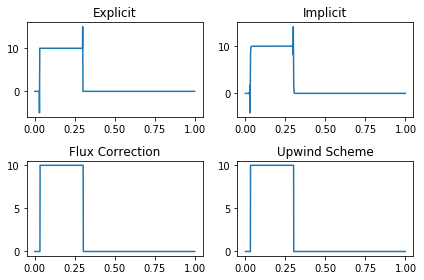

-------------------------------------------------------------------


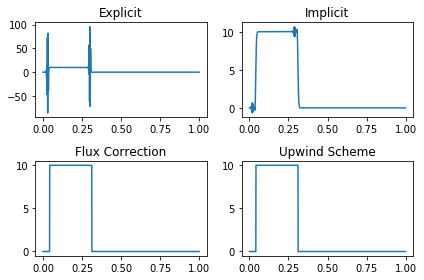

-------------------------------------------------------------------


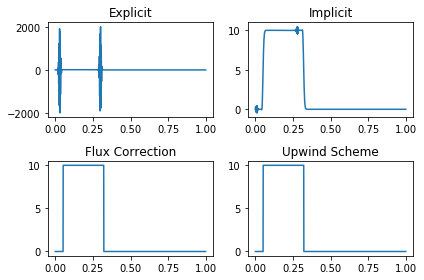

-------------------------------------------------------------------


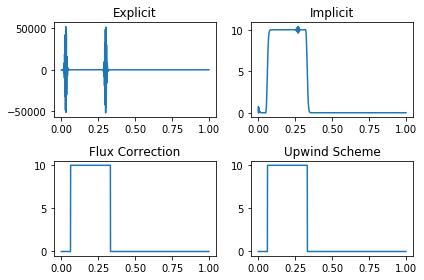

-------------------------------------------------------------------


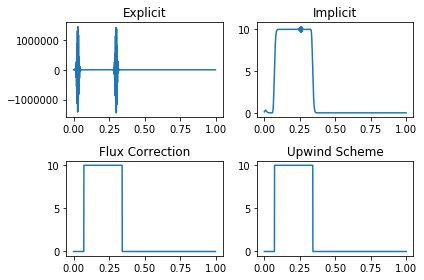

-------------------------------------------------------------------


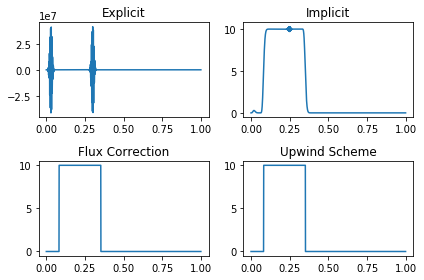

-------------------------------------------------------------------


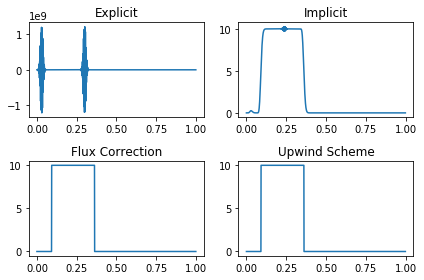

-------------------------------------------------------------------


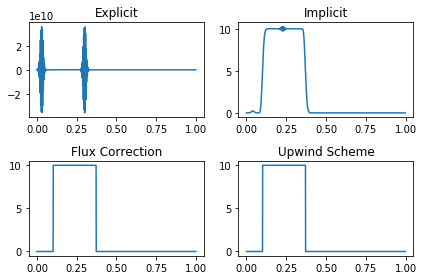

-------------------------------------------------------------------


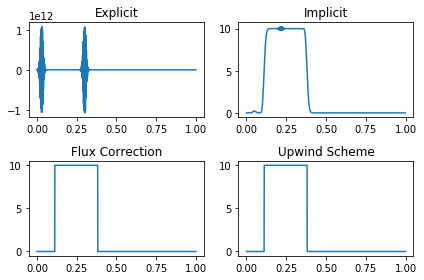

-------------------------------------------------------------------


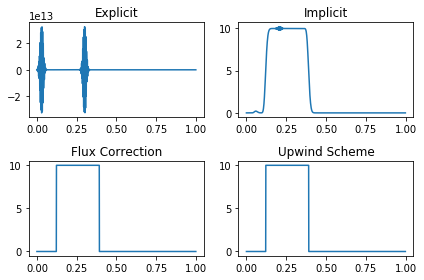

-------------------------------------------------------------------


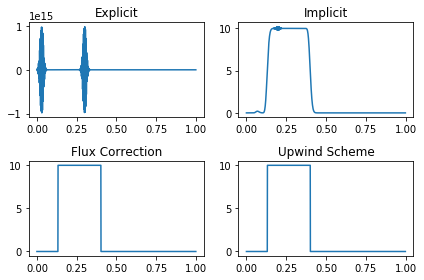

-------------------------------------------------------------------


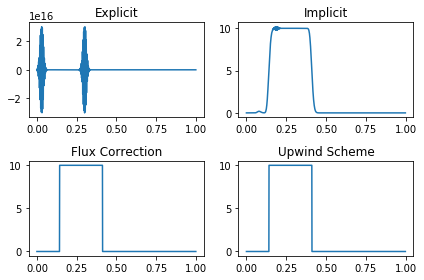

-------------------------------------------------------------------


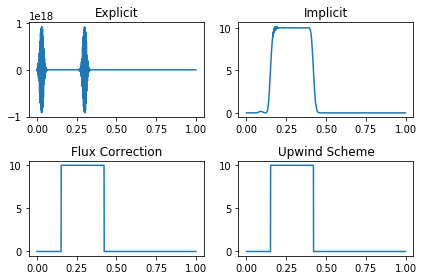

-------------------------------------------------------------------


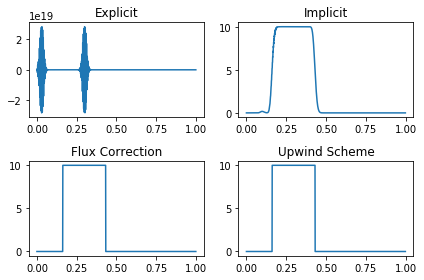

-------------------------------------------------------------------


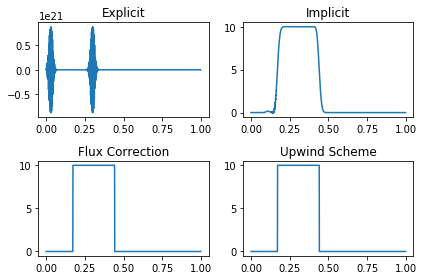

-------------------------------------------------------------------


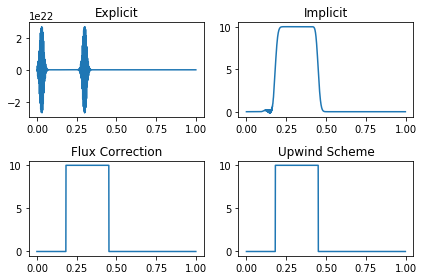

-------------------------------------------------------------------


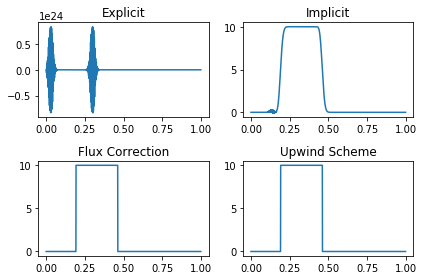

-------------------------------------------------------------------


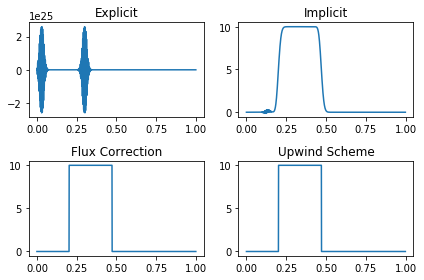

-------------------------------------------------------------------


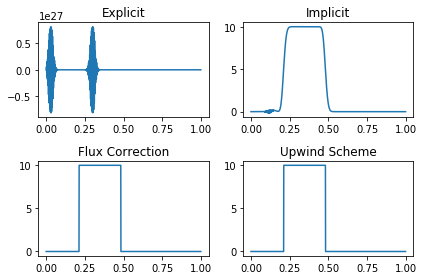

-------------------------------------------------------------------


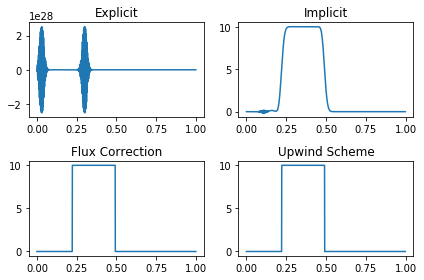

-------------------------------------------------------------------


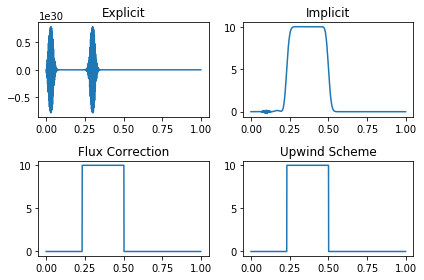

-------------------------------------------------------------------


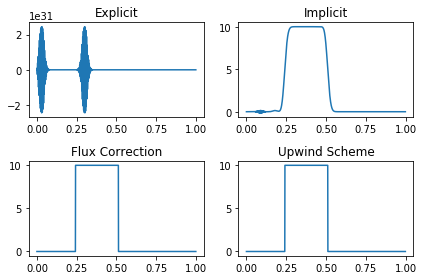

-------------------------------------------------------------------


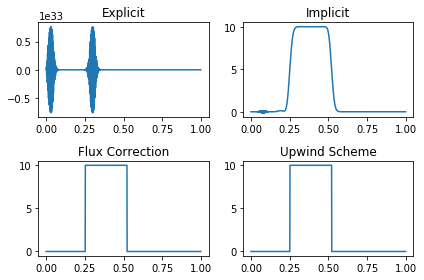

-------------------------------------------------------------------


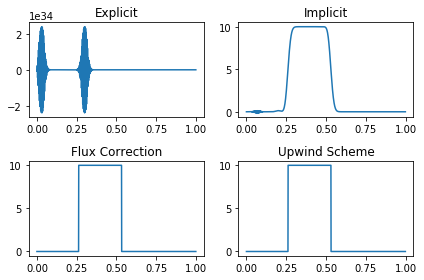

-------------------------------------------------------------------


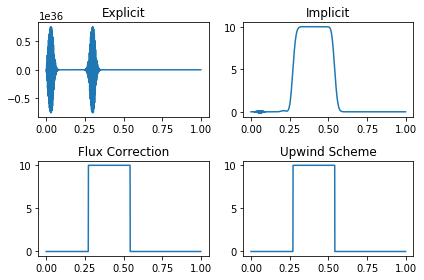

-------------------------------------------------------------------


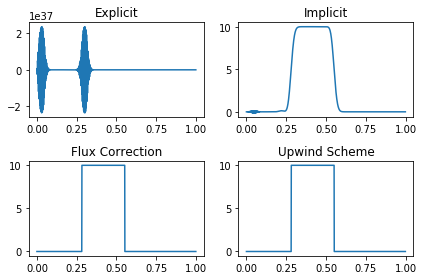

-------------------------------------------------------------------


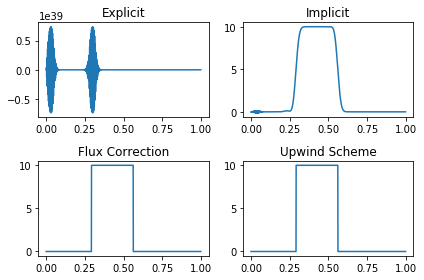

-------------------------------------------------------------------


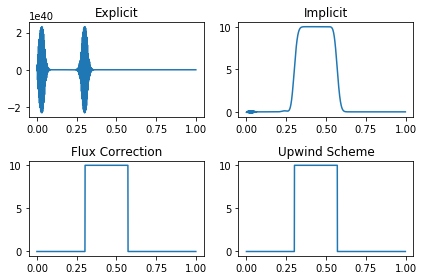

-------------------------------------------------------------------


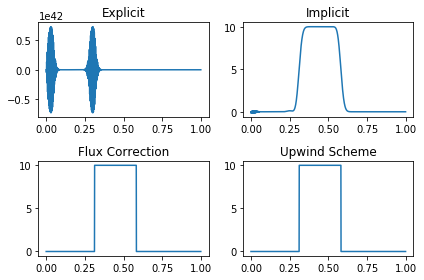

-------------------------------------------------------------------


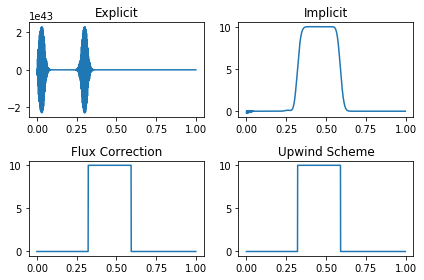

-------------------------------------------------------------------


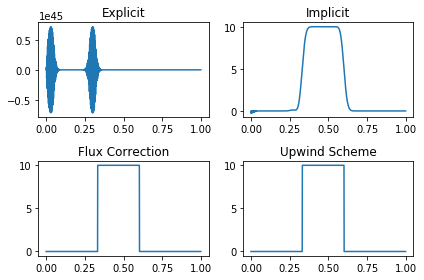

-------------------------------------------------------------------


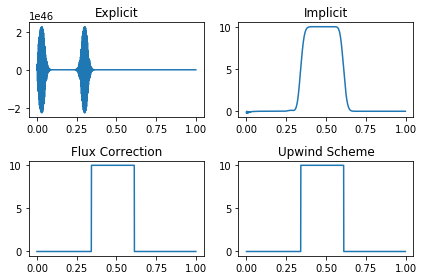

-------------------------------------------------------------------


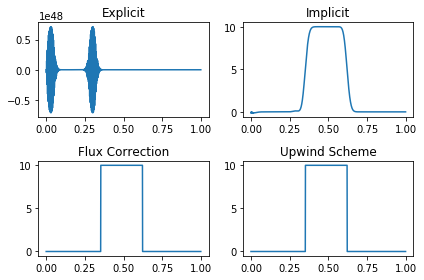

-------------------------------------------------------------------


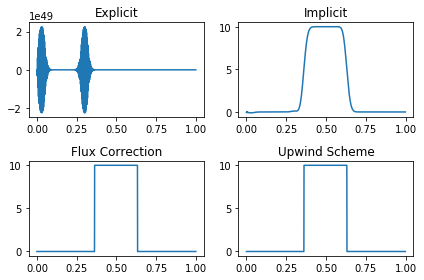

-------------------------------------------------------------------


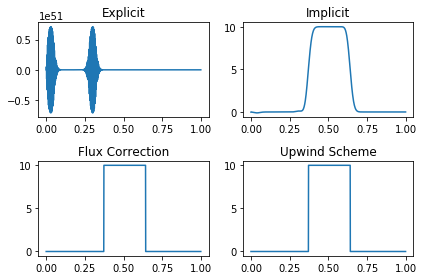

-------------------------------------------------------------------


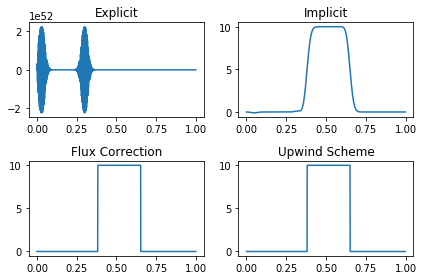

-------------------------------------------------------------------


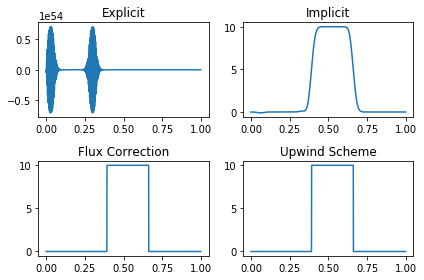

-------------------------------------------------------------------


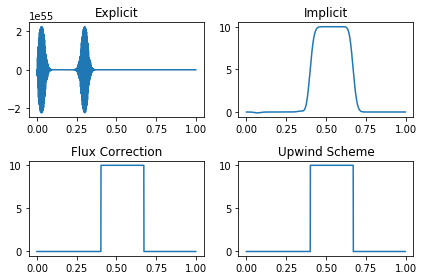

-------------------------------------------------------------------


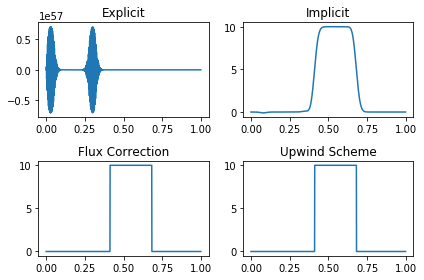

-------------------------------------------------------------------


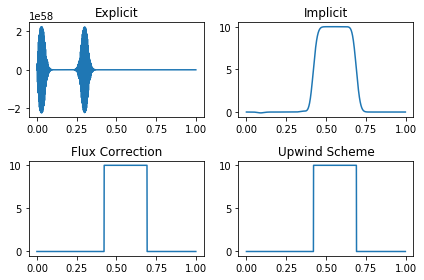

-------------------------------------------------------------------


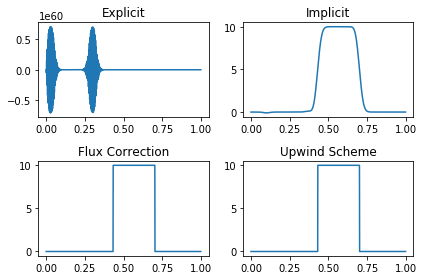

-------------------------------------------------------------------


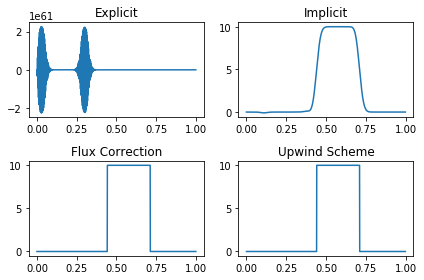

-------------------------------------------------------------------


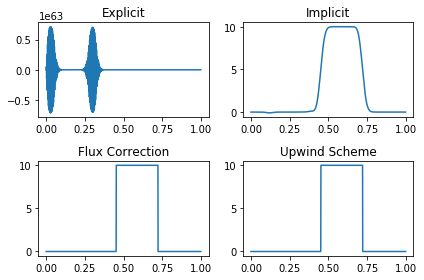

-------------------------------------------------------------------


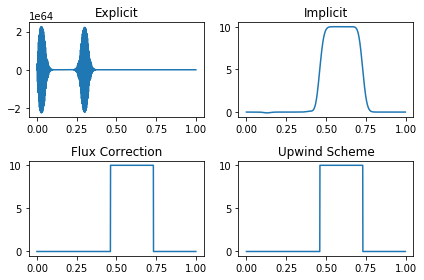

-------------------------------------------------------------------


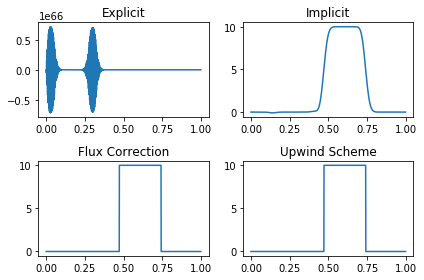

-------------------------------------------------------------------


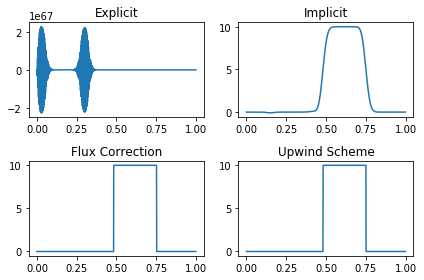

-------------------------------------------------------------------


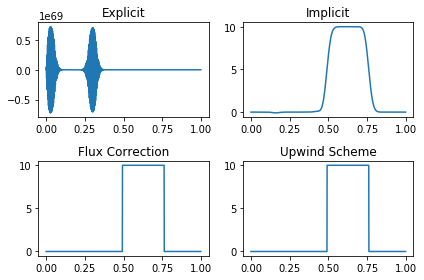

-------------------------------------------------------------------


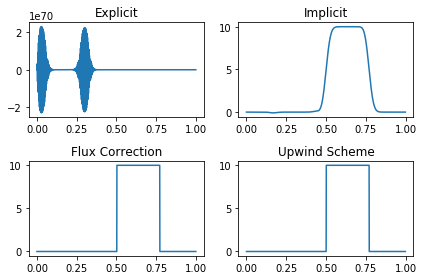

-------------------------------------------------------------------


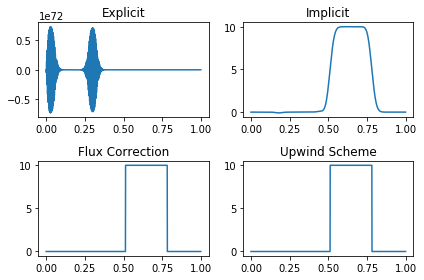

-------------------------------------------------------------------


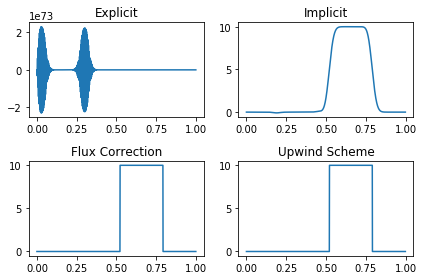

-------------------------------------------------------------------


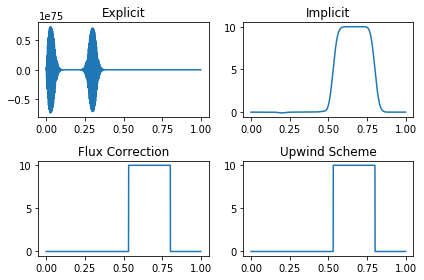

-------------------------------------------------------------------


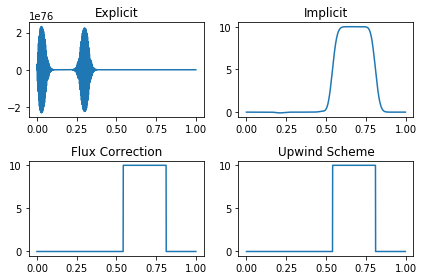

-------------------------------------------------------------------


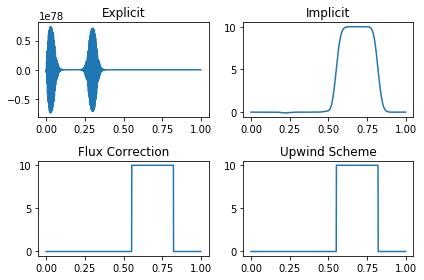

-------------------------------------------------------------------


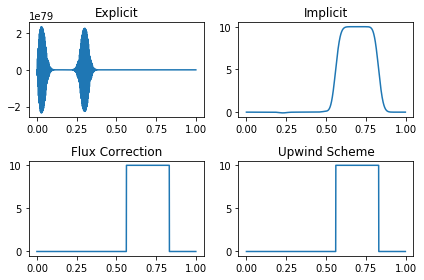

-------------------------------------------------------------------


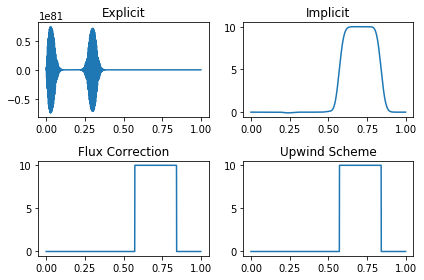

-------------------------------------------------------------------


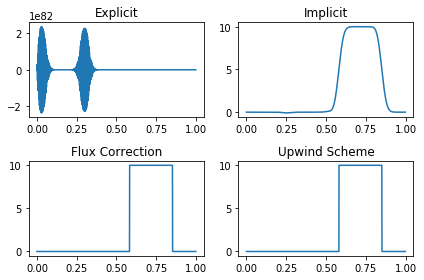

-------------------------------------------------------------------


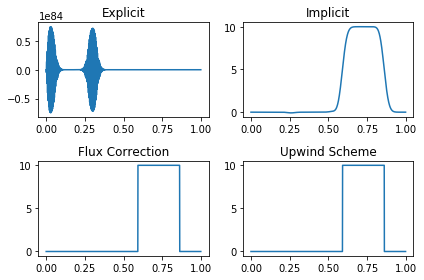

-------------------------------------------------------------------


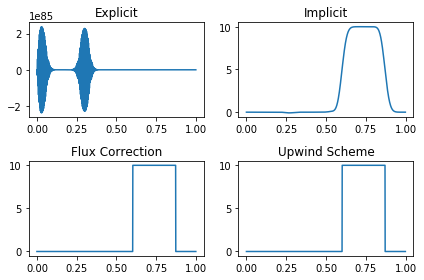

-------------------------------------------------------------------


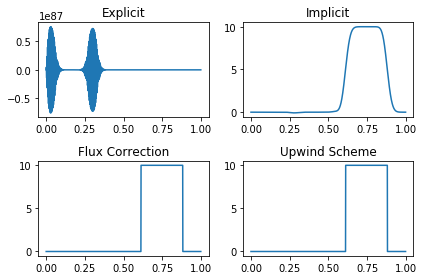

-------------------------------------------------------------------


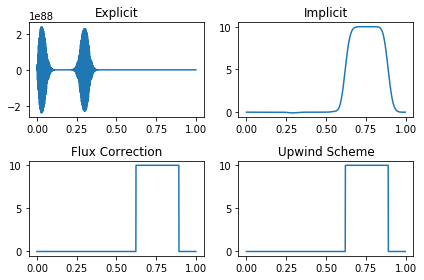

-------------------------------------------------------------------


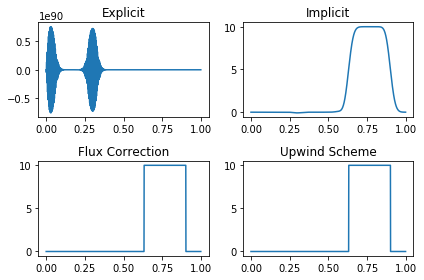

-------------------------------------------------------------------


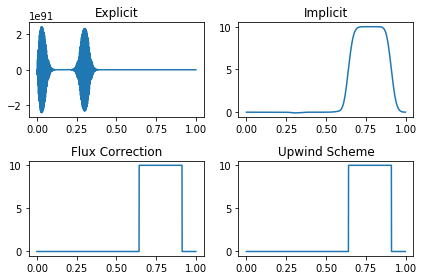

-------------------------------------------------------------------


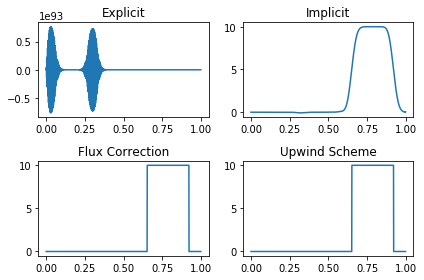

-------------------------------------------------------------------


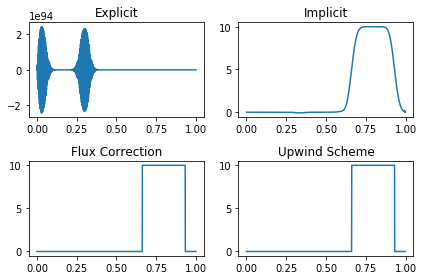

-------------------------------------------------------------------


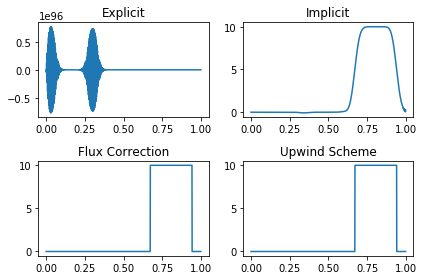

-------------------------------------------------------------------


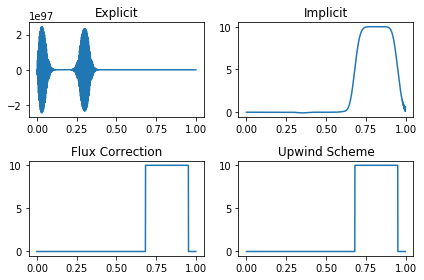

-------------------------------------------------------------------


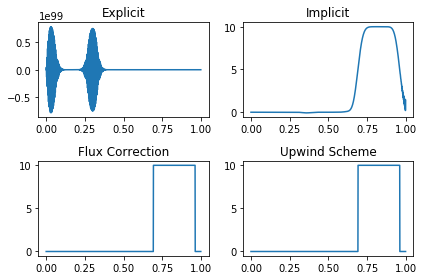

-------------------------------------------------------------------


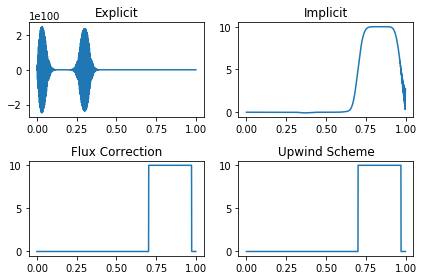

-------------------------------------------------------------------


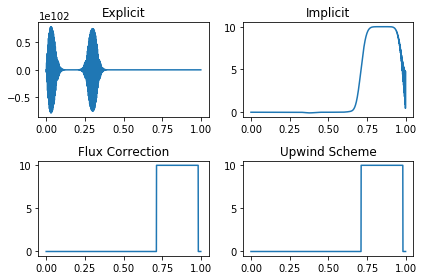

-------------------------------------------------------------------


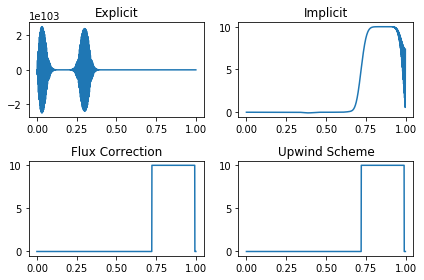

-------------------------------------------------------------------


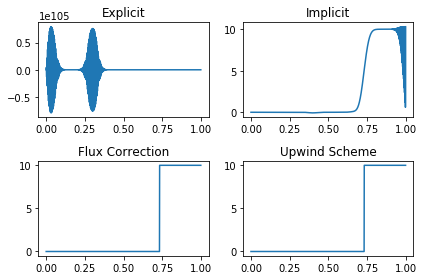

-------------------------------------------------------------------


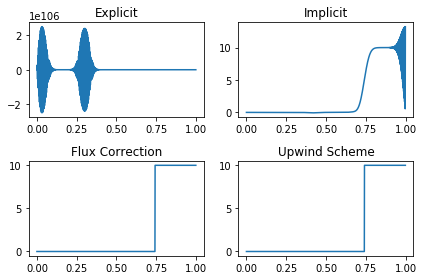

-------------------------------------------------------------------


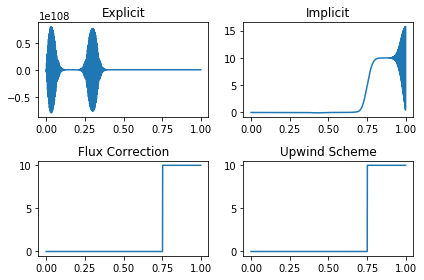

-------------------------------------------------------------------


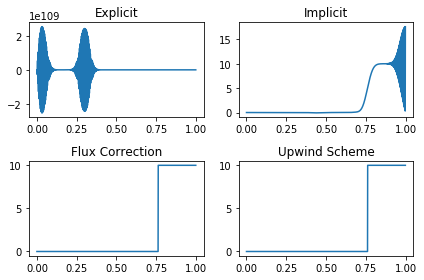

-------------------------------------------------------------------


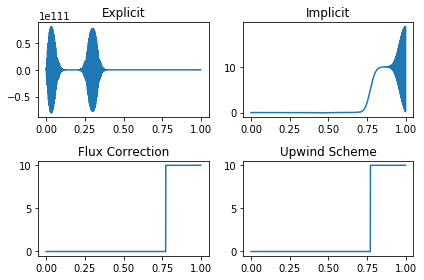

-------------------------------------------------------------------


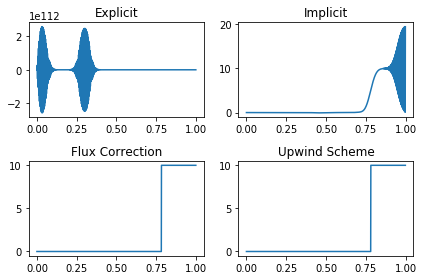

-------------------------------------------------------------------


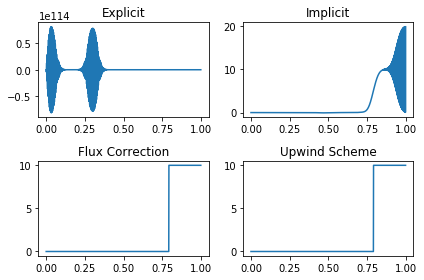

-------------------------------------------------------------------


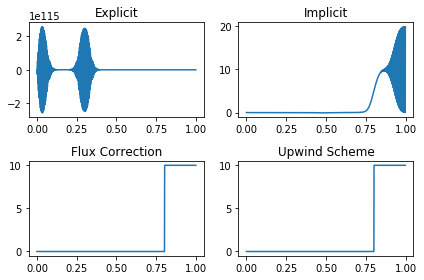

-------------------------------------------------------------------


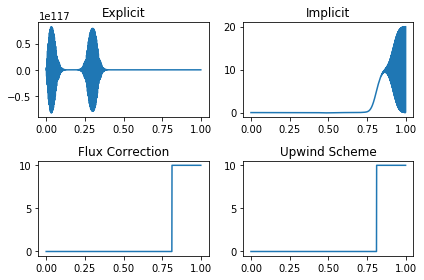

-------------------------------------------------------------------


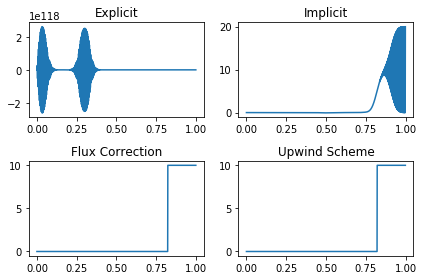

-------------------------------------------------------------------


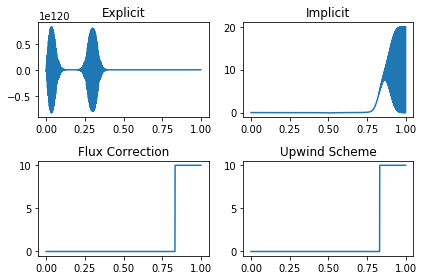

-------------------------------------------------------------------


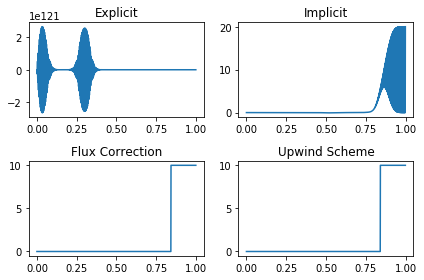

-------------------------------------------------------------------


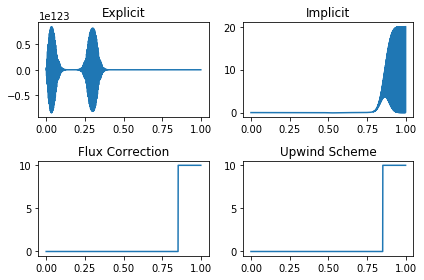

-------------------------------------------------------------------


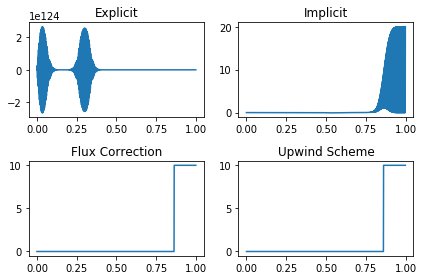

-------------------------------------------------------------------


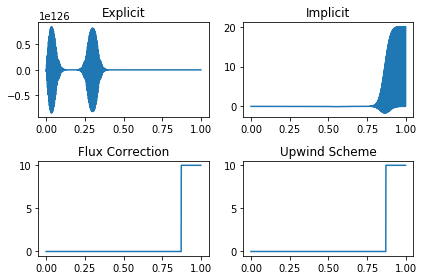

-------------------------------------------------------------------


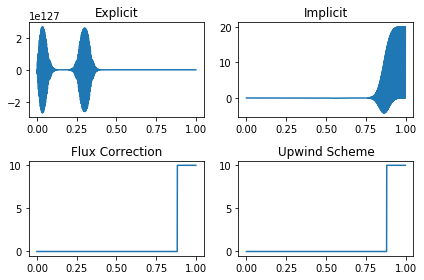

-------------------------------------------------------------------


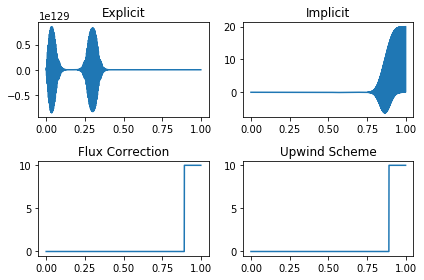

-------------------------------------------------------------------


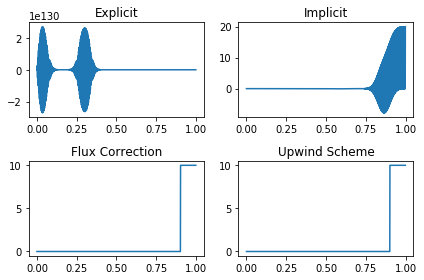

-------------------------------------------------------------------


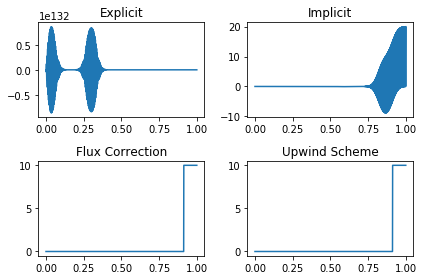

-------------------------------------------------------------------


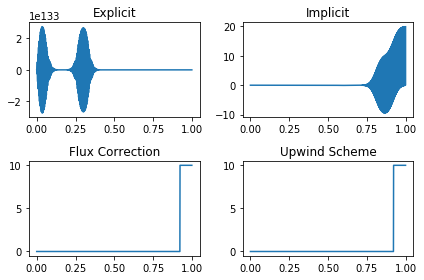

-------------------------------------------------------------------


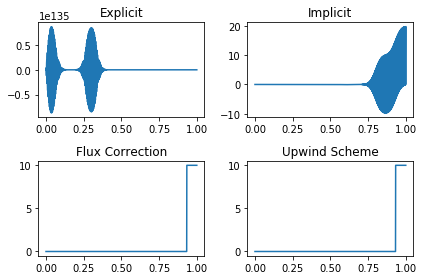

-------------------------------------------------------------------


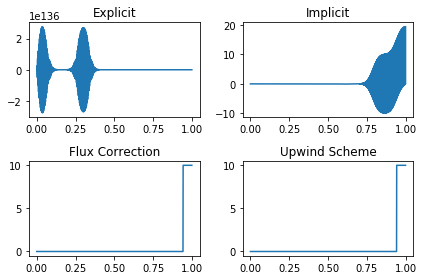

-------------------------------------------------------------------


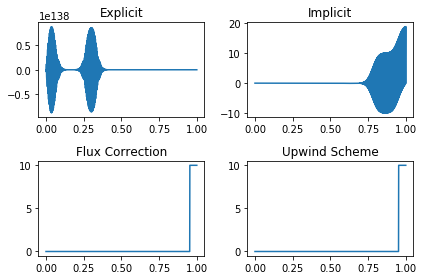

-------------------------------------------------------------------


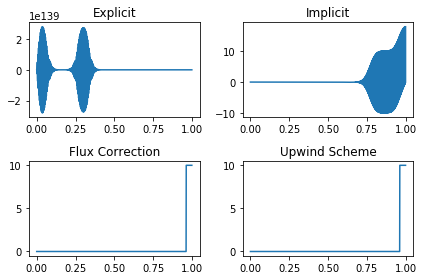

-------------------------------------------------------------------


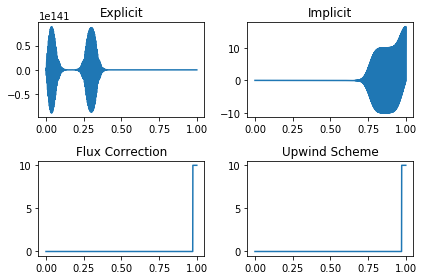

-------------------------------------------------------------------


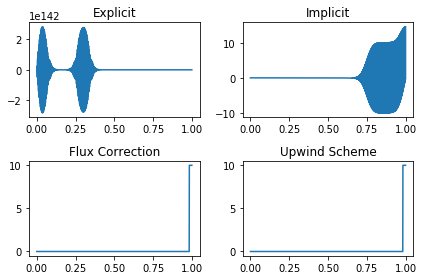

-------------------------------------------------------------------


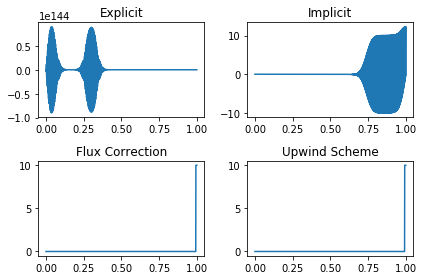

-------------------------------------------------------------------


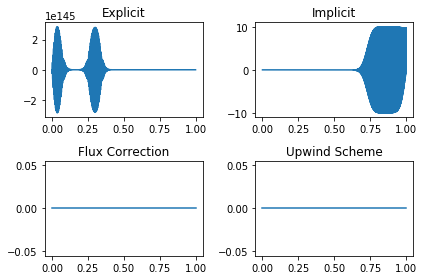

-------------------------------------------------------------------


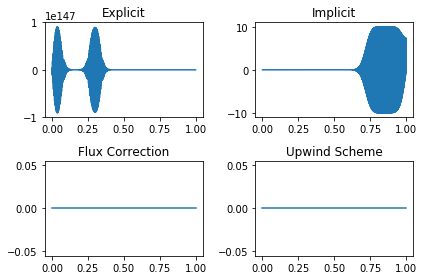

-------------------------------------------------------------------


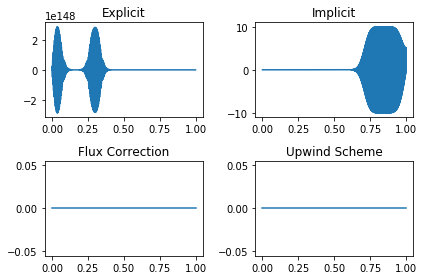

-------------------------------------------------------------------


In [2]:
import numpy as np
import matplotlib.pyplot as plt
spacegrid=1000
width=1.0
xx=np.arange(spacegrid)/spacegrid*width
timesteps=1000
simulationtime=1.0
velocity=1.0
dt=simulationtime/timesteps
dx=width/spacegrid
#rho=rho1=rho=rho1=np.exp(-(500*(xx-0.3)*(xx-0.3)))
rho=rho1=rho=rho1=rhoupwind=np.zeros(spacegrid,float)
rho[30:300]=rho1[30:300]=rho[30:300]=rho1[30:300]=10
rho2=qtd=np.zeros(spacegrid+4,float)
rhoupwind=np.zeros((spacegrid+2),float)
rho2[2:spacegrid+2]=rho
rhoupwind[1:-1]=rho
veolcitygrid=velocity*np.ones(spacegrid)
zeromatrix=np.zeros((spacegrid),float)
def tridiagDense(r,nxp,k1=-1,k2=0,k3=1):
    a=np.ones(nxp-1)*(-r)
    b=np.ones(nxp)
    c=-1*a
    return np.diag(a,k1)+np.diag(b,k2)+np.diag(c,k3)
   
def fourPlots(spacegrid,xx,rho0,rho10,rho20,rho3):      
        f, axarr = plt.subplots(2, 2)
        axarr[0,0].plot(xx,rho0);
        axarr[0,0].set_title('Explicit')
       
        axarr[0,1].plot(xx,rho10)
        axarr[0,1].set_title('Implicit')

        axarr[1,0].plot(xx,rho20[0:spacegrid])
        axarr[1,0].set_title('Flux Correction')
       
        axarr[1,1].plot(xx,rho3[0:spacegrid])
        axarr[1,1].set_title('Upwind Scheme')
       
        plt.tight_layout()
        plt.show()
        print("-------------------------------------------------------------------")

for t in range(timesteps):
   
    #implicit----------------------------------------------------------------------------------------
    rho[1:spacegrid-1]=rho[1:spacegrid-1]-velocity*(dt/(2*dx))*(rho[2:spacegrid]-rho[0:spacegrid-2])
    #------------------------------------------------------------------------------------------------
   
    #explicit----------------------
    ep=velocity*(dt/(2*dx))
    IA=tridiagDense(ep,spacegrid)
    B=np.linalg.inv(IA)
    rho1=B.dot(rho1)
    #------------------------------
   
   
    #flux correction---------------------------------------------------------------------------------------
    #step-1
    flow=(0.5*(velocity*rho2[2:spacegrid+3]+velocity*rho2[1:spacegrid+2])-0.5*abs(velocity)*(rho2[2:spacegrid+3]-rho2[1:spacegrid+2]))*dt
    #step-2
    fhigh=((7.0/12)*(velocity*rho2[2:spacegrid+3]+velocity*rho2[1:spacegrid+2])-(1.0/12)*(velocity*rho2[3:spacegrid+4]+velocity*rho2[0:spacegrid+1]))*dt
    #step-3
    adif=fhigh-flow
    #step-4
    qtd[2:spacegrid+2]=rho2[2:spacegrid+2]-(flow[1:spacegrid+1]-flow[0:spacegrid])/dx
    #step-5
    ac=np.arange(spacegrid+1)
    for aaa in np.arange(spacegrid+1):
        if adif[aaa]>=0:
            signn=1.0
        else:
            signn=-1.0
        ac[aaa]=signn*max(0,min(abs(adif[aaa]),signn*(qtd[aaa+3]-qtd[aaa+2])*dx,signn*(qtd[aaa+1]-qtd[aaa])*dx))
    #step-6
    rho2[2:spacegrid+2]=qtd[2:spacegrid+2]-(ac[1:spacegrid+1]-ac[0:spacegrid])/dx


    #------------------------------------------------------------------------------------------------------
   #---------- Upwind Scheme-------------------------------------------------------------------------------
    aplus=np.maximum(zeromatrix,veolcitygrid)
    aminus=np.minimum(zeromatrix,veolcitygrid)
    rhoplus=(rhoupwind[2:]-rhoupwind[1:-1])/dx
    rhominus=(rhoupwind[1:-1]-rhoupwind[:-2])/dx
    rhoupwind[1:-1]=rhoupwind[1:-1]-dt*(aplus*rhominus+aminus*rhoplus)
    
    
   
    #plotting------------------------
    if (t%10) ==0:
        fourPlots(spacegrid,xx,rho,rho1,rho2,rhoupwind)
    #--------------------------------

In [5]:
dt

0.001